<a href="https://colab.research.google.com/github/chorltonm/fa-cup-upsets/blob/main/notebooks/models/descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Libaries
import os
import json
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import drive
from google.colab import userdata

from matplotlib import pyplot

In [9]:
# Mount Google Drive
drive.mount('/content/drive')

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Authentication credentials and keys

# Google Service Account

# Load the JSON key from local Google Collab file
key = json.load(open('/content/drive/MyDrive/service_account.json', 'r'))

# Authenticate using the loaded key
credentials = service_account.Credentials.from_service_account_info(key)

# Set up the BigQuery client with the credentials to project
client = bigquery.Client(credentials=credentials, project='birkbeck-msc-project-422917')

In [11]:
# Feature Data

fa_cup_raw_features = """
    select * from preparation_layer.view_fa_cup_round_3_features
"""

fa_cup_raw_features_df = client.query(fa_cup_raw_features).to_dataframe()
display(fa_cup_raw_features_df)


,season_year,arena_stadium_capacity,home_team_league_level,home_win,home_team_round_3_position,home_team_massey,home_team_colley,home_team_keener,home_team_trueskill,home_team_borda_count,...,match_weather_data_hours_dew,match_weather_data_hours_precip,match_weather_data_hours_snow,match_weather_data_hours_snowdepth,match_weather_data_hours_windspeed,match_weather_data_hours_pressure,match_weather_data_hours_visibility,match_weather_data_hours_cloudcover,match_weather_data_hours_condition,target_variable
0,09/10,41837,1,1,1,1,1,12,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
1,14/15,41837,1,1,1,1,1,12,1,1,...,34.70,0.000,0.0,0.00,4.80,1036.70,2.05,95.90,Overcast,0
2,16/17,41837,1,1,1,1,1,12,1,1,...,47.00,0.000,0.0,0.00,2.10,1031.70,4.20,87.00,Partially cloudy,0
3,20/21,74879,1,1,1,1,1,12,1,1,...,71.20,0.000,NaN,0.00,7.65,1015.50,5.15,67.10,Partially cloudy,0
4,09/10,74879,1,0,2,3,7,4,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,14/15,<NA>,6,0,64,58,64,53,63,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
346,17/18,9527,4,1,64,58,64,53,63,64,...,37.15,0.000,0.0,0.00,14.45,1012.75,9.00,94.25,Overcast Partially cloudy,1
347,18/19,6064,6,0,64,58,64,53,63,64,...,41.45,0.000,0.0,0.00,6.35,1036.35,15.15,98.65,Overcast,0
348,20/21,4100,6,1,64,58,64,53,63,64,...,32.75,0.001,0.0,2.36,6.45,1026.75,6.20,69.50,"Snow, Rain, Partially cloudy Partially cloudy",1


In [12]:
# These columns only included to work out home advantage during the Logistic Regression and Neural Netowrks
columns_to_exclude = ['home_win','home_team_league_level','away_team_league_level']

# Create a new DataFrame excluding the specified columns
fa_cup_filtered_df = fa_cup_raw_features_df.drop(columns=columns_to_exclude)
fa_cup_filtered_df['target_variable'] = fa_cup_filtered_df['target_variable'].astype('category')
pivoted_describe = fa_cup_filtered_df.describe(include="all").transpose()
display(pivoted_describe)

pivoted_describe.to_excel("fa_cup_features_describe.xlsx")


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
season_year,350,15,10/11,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arena_stadium_capacity,335.0,<NA>,<NA>,<NA>,27028.719403,16509.833289,2150.0,12500.0,25456.0,33597.0,90000.0
home_team_round_3_position,350.0,<NA>,<NA>,<NA>,33.537143,19.666198,1.0,15.0,34.0,51.0,64.0
home_team_massey,350.0,<NA>,<NA>,<NA>,31.862857,19.255886,1.0,15.0,31.0,49.0,64.0
home_team_colley,350.0,<NA>,<NA>,<NA>,31.482857,18.909784,1.0,15.25,30.0,49.0,64.0
home_team_keener,350.0,<NA>,<NA>,<NA>,31.674286,19.544298,1.0,15.0,31.0,50.0,64.0
home_team_trueskill,350.0,<NA>,<NA>,<NA>,31.351429,18.783625,1.0,16.0,30.0,47.0,64.0
home_team_borda_count,350.0,<NA>,<NA>,<NA>,32.008571,19.44362,1.0,15.25,30.0,50.0,64.0
home_team_local_kemeny_optimisation,350.0,<NA>,<NA>,<NA>,32.028571,19.438516,1.0,15.25,30.0,50.0,64.0
home_lineup_strength,247.0,NaN,NaN,NaN,0.781822,0.093454,0.15,0.75,0.79,0.835,1.0


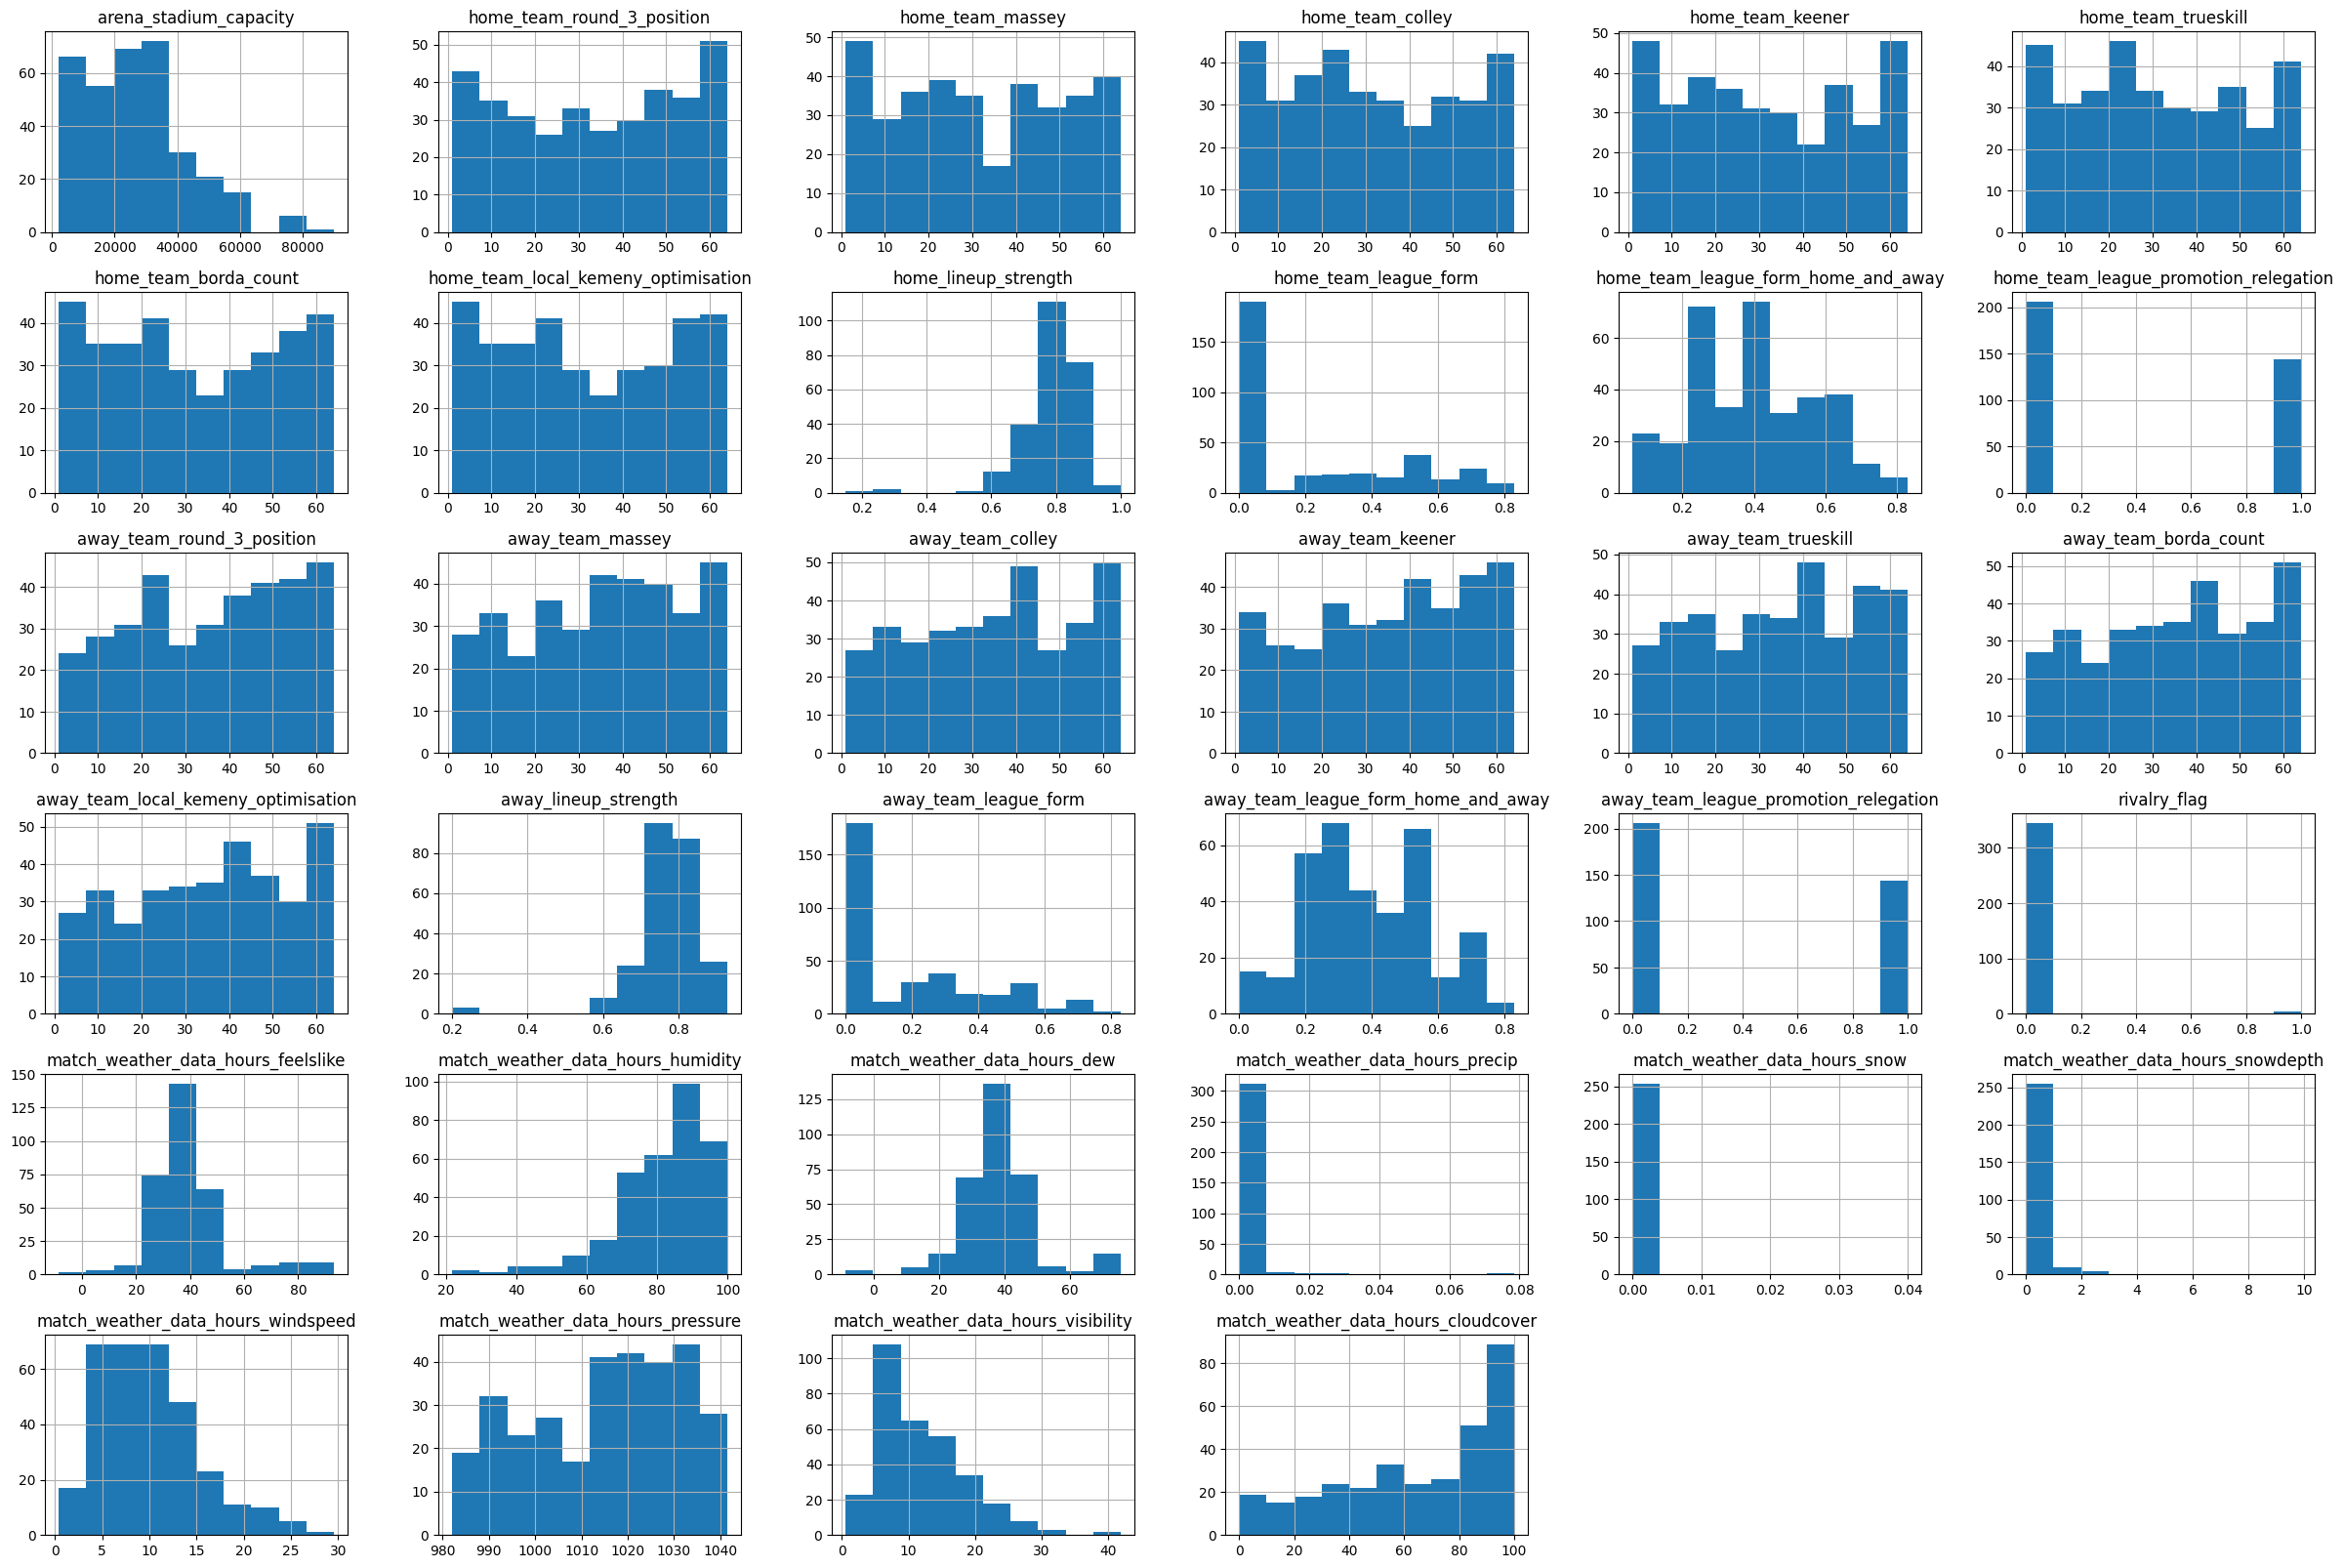

In [13]:
# Histograms

fa_cup_filtered_df.hist(bins=10, figsize=(30,20))

# Save the figure as a PNG file
pyplot.savefig('fa_cup_histograms.png', dpi=300, bbox_inches='tight')
pyplot.show()
pyplot.close()



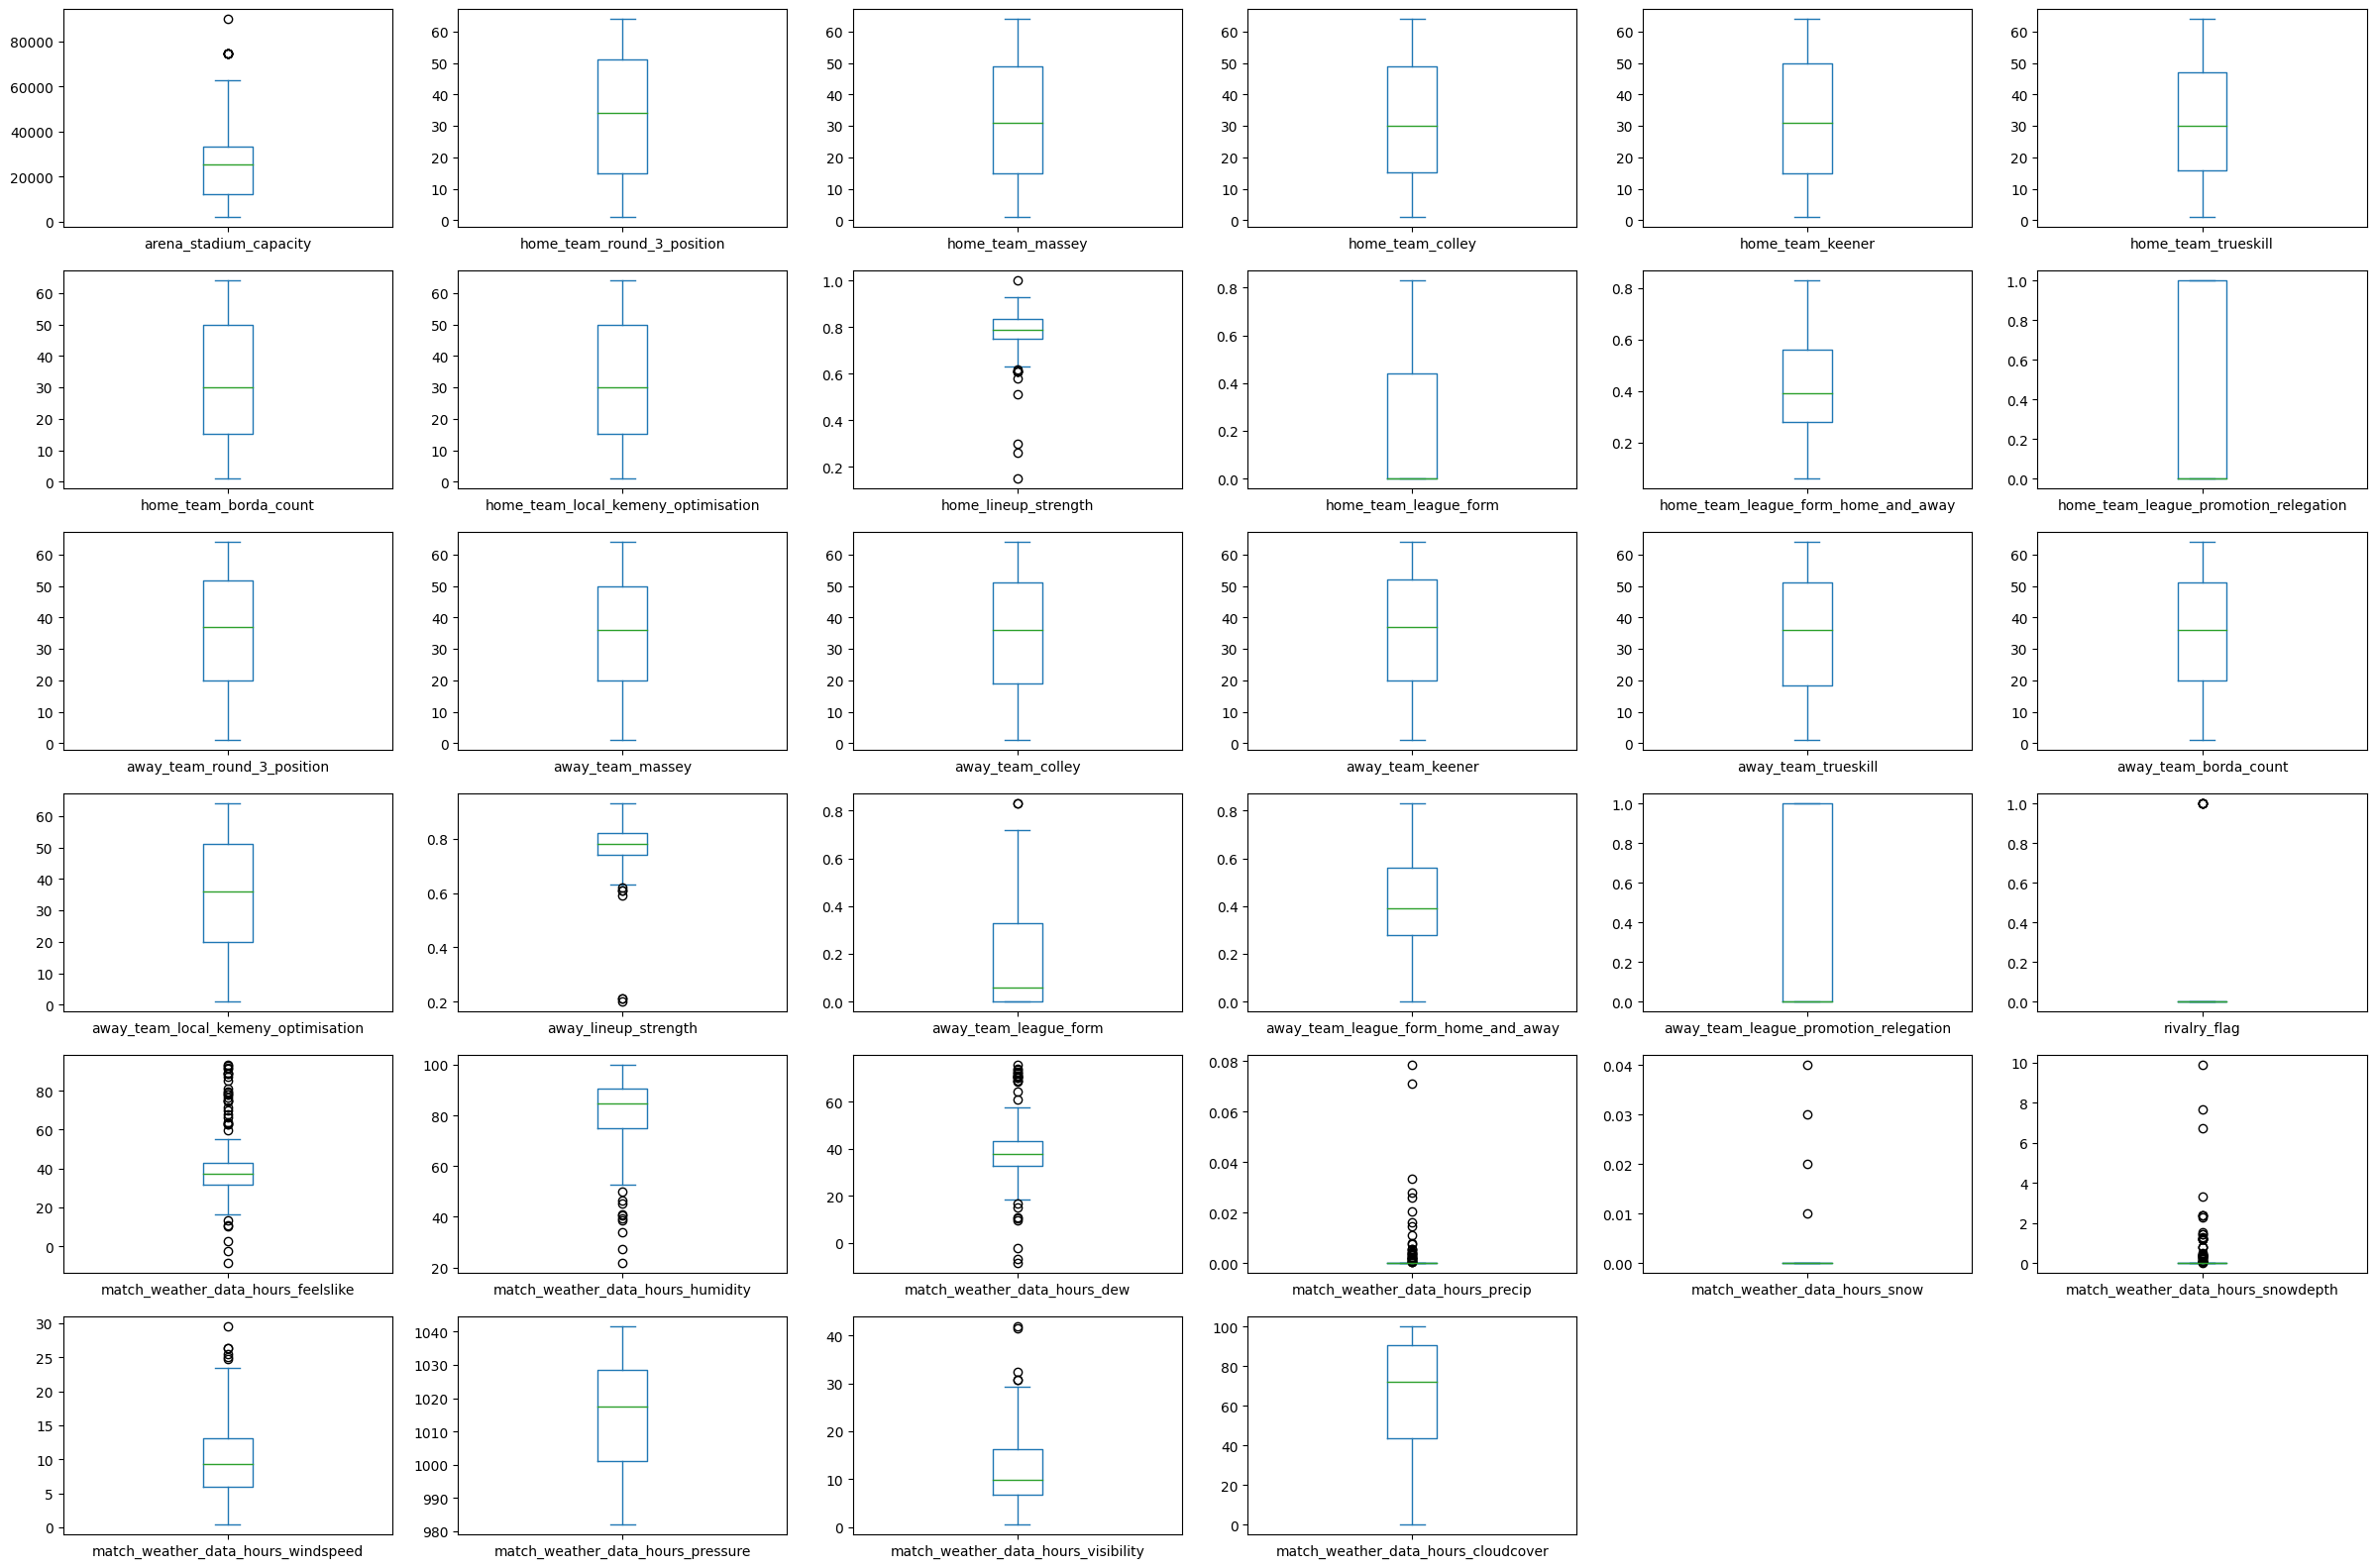

In [14]:

fa_cup_filtered_df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(30,20))

pyplot.savefig('fa_cup_boxplots.png', dpi=300, bbox_inches='tight')
pyplot.show()
pyplot.close()
